In [2]:
# import 
import nltk

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
import string

In [89]:
from nltk.corpus import stopwords

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\toshi\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> h

Commands:
  d) Download a package or collection     u) Update out of date packages
  l) List packages & collections          h) Help
  c) View & Modify Configuration          q) Quit

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
# Datasets 
# https://archive.ics.uci.edu/ml/index.php

In [6]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
len(messages)

5574

In [9]:
messages[100]
# messages are tab separated

"ham\tPlease don't text me anymore. I have nothing else to say."

In [10]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')
    

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [12]:
# convert to dataframe
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label', 'message'])

In [13]:
messages.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
messages['length'] = messages['message'].apply(len)

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


(0, 1000)

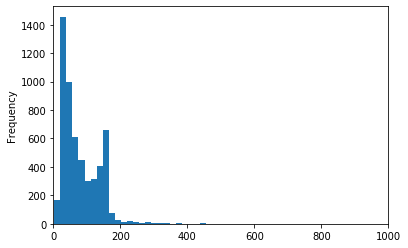

In [22]:
messages['length'].plot.hist(bins=50)
plt.xlim(0, 1000)
# why all the way to 1000? long message

In [23]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
# find message
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

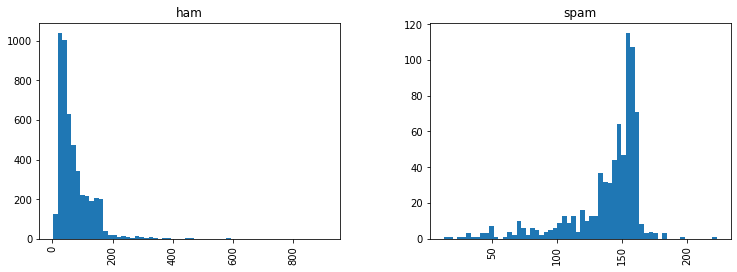

In [29]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))
plt.show()

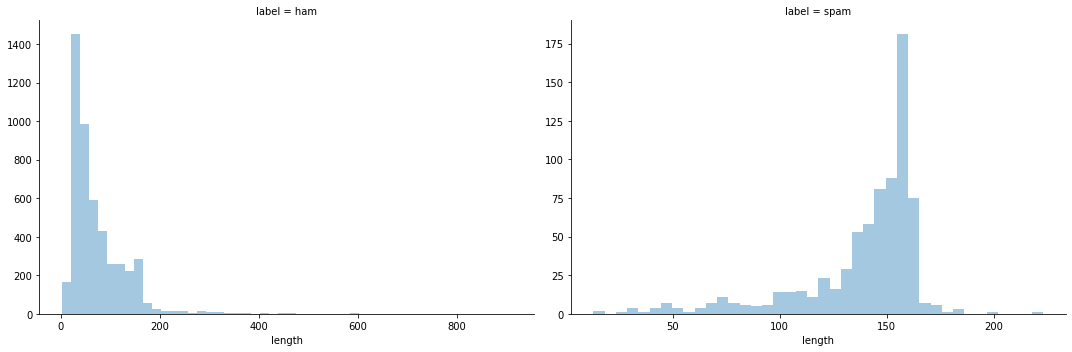

In [59]:
g = sns.FacetGrid(messages, col="label", height=5, aspect=1.5, sharey=False, sharex=False)
g.map(sns.distplot, "length", kde=False)

In [76]:
mess = 'Sample message! Notice: is has punctuation.'

In [100]:
nopunc = [c for c in mess if c not in string.punctuation]

In [101]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [91]:
nopunc = ''.join(nopunc)

In [92]:
nopunc

'Sample message Notice is has punctuation'

In [93]:
nopunc.split()

['Sample', 'message', 'Notice', 'is', 'has', 'punctuation']

In [95]:
# stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [96]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [104]:
def text_process(mess):
    """
    1. remove punctuation and join together
    2. remove stopwords
    3. return list of cleaned words
    """
    nopunc = [character for character in mess if character not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [105]:
"""
Tokenize
This is converting text string into a list of tokens
"""
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [107]:
# countvectorizer
# sparse matrix: lots of elements are 0 (saves memory when adjusted)
# bow = bag of words
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [110]:
# print vocab words
print(len(bow_transformer.vocabulary_))

11425


In [111]:
# grab one message
mess4 = messages['message'][3]

In [112]:
print(mess4)

U dun say so early hor... U c already then say...


In [113]:
bow4 = bow_transformer.transform([mess4])

In [117]:
# 7 unique words in message 4 after removing common stopwords
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [116]:
print(bow4.shape)

(1, 11425)


In [122]:
# check which ones occur twice
bow_transformer.get_feature_names()[9554]

'say'

In [123]:
messages_bow = bow_transformer.transform(messages['message'])

In [128]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

# non zero occurances
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [130]:
# sparsity
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))
# adding round(sparsity makes it zero)

sparsity: 0.07940295412668218


In [132]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [133]:
tfidf4 = tfidf_transformer.transform(bow4)

In [134]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [135]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [136]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [139]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [140]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [141]:
messages['label'][3]

'ham'

In [143]:
# train everything
# trained everything on training, shouldn't do this. We never split the data
all_pred = spam_detect_model.predict(messages_tfidf)

In [146]:
# lets train test split
message_train, message_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=.3)

In [149]:
# Store pipeline of data
pipeline = Pipeline([
#     String to token integers
    ('bag_of_words', CountVectorizer(analyzer=text_process)), 
#     Take integers to weighted tfidf scores
    ('tfidf', TfidfTransformer()),
#     Train on model
#     Can use any classifier like RandomForestClassifier
    ('classifier', MultinomialNB())
])

In [150]:
# Treat pipeline as normal estimator
# Fit
pipeline.fit(message_train, label_train)

Pipeline(memory=None,
         steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function text_process at 0x0000020687B978B8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=Fal

In [151]:
# Predict on message test
predictions = pipeline.predict(message_test)

In [154]:
#Classification report test vs predictions
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1456
        spam       1.00      0.69      0.82       216

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.96      1672

